In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import os
import numpy as np
from IPython.display import clear_output

In [2]:
ds_co2_path = nc.Dataset("co2_path.xy.nc")
ds_co2 = nc.Dataset("co2.xy.nc")
ds_u = nc.Dataset("u.xy.nc")
ds_v = nc.Dataset("v.xy.nc")
ds_w = nc.Dataset("w.xy.nc")

In [3]:
co2_path = np.array(ds_co2_path.variables["co2_path"][:])
co2 = np.array(ds_co2.variables["co2"][:])
u = np.array(ds_u.variables["u"][:])
v = np.array(ds_v.variables["v"][:])
w = np.array(ds_w.variables["w"][:])

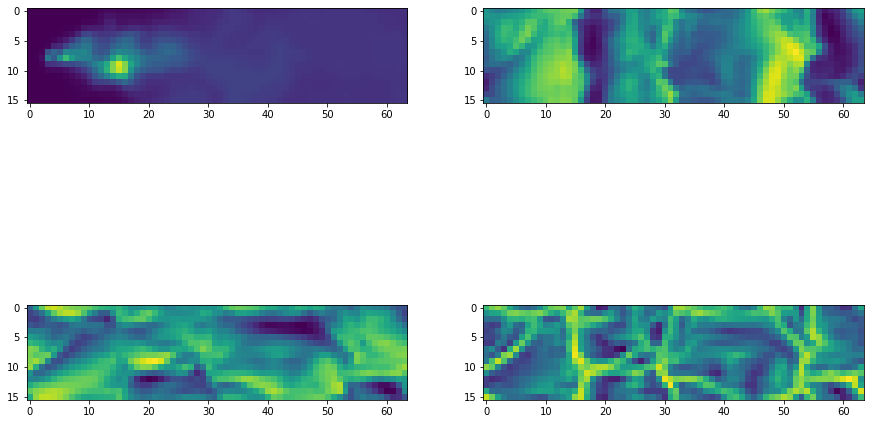

In [42]:
for i in range(len(co2_path)):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(co2_path[i], vmin=0, vmax=0.5)
    plt.subplot(2, 2, 2)
    plt.imshow(u[i, 0])
    plt.subplot(2, 2, 3)
    plt.imshow(v[i, 0])
    plt.subplot(2, 2, 4)
    plt.imshow(w[i, 0])
    plt.pause(0.01)
    clear_output(wait=True)


In [4]:
u_mean = np.mean(u, axis=0)
v_mean = np.mean(v, axis=0)
w_mean = np.mean(w, axis=0)

u_prime = u - u_mean
v_prime = v - v_mean
w_prime = w - w_mean

tke = 0.5 * (u_prime**2 + v_prime**2 + w_prime**2)
tke_time_series = np.mean(tke, axis=(2, 3))

In [5]:
tke_time_series.shape

(577, 3)

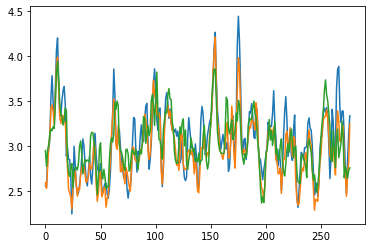

In [6]:
plt.plot(tke_time_series[300:])

In [7]:
ds_co2 = nc.Dataset("co2.xz.nc")
ds_u = nc.Dataset("u.xz.nc")
ds_v = nc.Dataset("v.xz.nc")
ds_w = nc.Dataset("w.xz.nc")

In [8]:
co2 = np.array(ds_co2.variables["co2"][:])
u = np.array(ds_u.variables["u"][:])
v = np.array(ds_v.variables["v"][:])
w = np.array(ds_w.variables["w"][:])

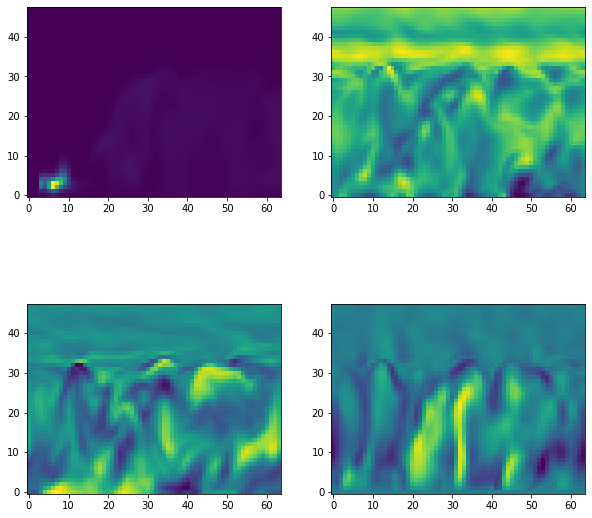

In [36]:
for i in range(len(co2)):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(co2[i, :, 0, :], origin="lower")
    plt.subplot(2, 2, 2)
    plt.imshow(u[i, :, 0, :], origin="lower")
    plt.subplot(2, 2, 3)
    plt.imshow(v[i, :, 0, :], origin="lower")
    plt.subplot(2, 2, 4)
    plt.imshow(w[i, :, 0, :], origin="lower")
    plt.pause(0.01)
    clear_output(wait=True)

In [9]:
u_mean = np.mean(u, axis=0)
v_mean = np.mean(v, axis=0)
w_mean = np.mean(w, axis=0)

u_prime = u - u_mean
v_prime = v - v_mean
w_prime = w - w_mean

tke = 0.5 * (u_prime**2 + v_prime**2 + w_prime**2)
tke_time_series = np.mean(tke, axis=(1, 3))

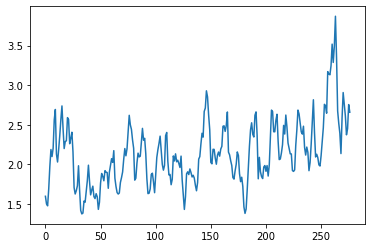

In [10]:
plt.plot(tke_time_series[300:])